# Machine Learning Foundation Project using Avocado Dataset

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Data Pre-Processing](#section3)<br>
4. [Exploratory Data Analysis](#section4)<br>
    - 4.1 [Distribution of Average Price](#section41)<br>
    - 4.2 [Analysis Based on Average Price](#section42)<br>
    - 4.3 [Analysis Based on Total Volume](#section43)<br>
    - 4.4 [Analysis Based on Region](#section44)<br>
5. [Feature Engineering](#section5)<br>
6. [Using Models for Prediction](#section6)<br>
7. [Models Evaluation](#section7)<br>
8. [Conclusion](#section8)<br>

<a id=section1></a>

## 1. Problem Statement

Given the historical data on __Avocado__ prices and sales volume in multiple US markets, develop a model to predict Average Price of Avocados using Regression Algorithms. Evaluate the model using possible __Model Evaluation Techniques__.

<a id=section2></a>

## 2. Data Loading and Description

The avocado dataset contains below columns.

- Date - The date of the observation
- AveragePrice - The average price of a single avocado
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold
- Total Bags - Small Bags + Large Bags + XLarge Bags
- Small Bags - Avocados sold in Small Bags
- Large Bags - Avocados sold in Large Bags
- XLarge Bags - Avocados sold in XLarge Bags
- type - conventional or organic
- year - the year
- region - the city or region of the observation

Dataset Source : https://github.com/insaid2018/Term-2/tree/master/Projects <br/>

### Importing Packages

In [1]:
#Import Required Packages for EDA
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# To apply seaborn whitegrid style to the plots.
plt.style.use('seaborn-whitegrid')
%matplotlib inline

import seaborn as sns
# To adjust seaborn settings for the plots.
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)

import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

In [2]:
df_avo = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv')
df_avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


This Dataset can be categorized as:
- Regression Problem to Predict Average Price of Avocados
- Classification Problem to Predict if Type of Avocado is Conventional or Organic

I am building model to predict Average Price of Avocados. Hence,

**Features / Explanatory Variables** are:
- Date - The date of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold
- Total Bags - Small Bags + Large Bags + XLarge Bags
- Small Bags - Avocados sold in Small Bags
- Large Bags - Avocados sold in Large Bags
- XLarge Bags - Avocados sold in XLarge Bags
- type - conventional or organic
- year - the year
- region - the city or region of the observation

**Target Variable** is:
- AveragePrice - The average price of a single avocado

### Check the shape of the dataset

In [3]:
df_avo.shape

(18249, 14)

### Check the columns

In [4]:
df_avo.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

### Check the descriptive statistics of the dataset

In [7]:
df_avo.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


### Check the info of the dataset

In [8]:
df_avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


__Observations__
- Numerical Columns - Unnamed: 0, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, year
- Categorical Columns - type, region
- Date is object type, convert to datetime type

In [9]:
df_avo['Date'] = pd.to_datetime(df_avo['Date'])

In [10]:
#Check Format for Date is properly converted
df_avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


### Check the missing values present in the dataset

In [11]:
df_avo.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Observations - No Missing Values.

<a id=section3></a>

## 3. Data Pre-Processing

In [12]:
#Drop Unnamed Column as it is ID
df_avo = df_avo.drop(['Unnamed: 0'], axis = 1)

In [13]:
#Rename Columns 4046, 4225,4770 to Meaningful Names. Source : https://loveonetoday.com/how-to/identify-hass-avocados/
df_avo = df_avo.rename(index=str, columns={"4046" : "Small Hass", "4225" : "Large Hass","4770" : "XLarge Hass"})
df_avo.head()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [14]:
#Check if Samples are Balanced Region Wise
df_avo.groupby('region').size()

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

Observation - Size of All Samples is Close to 338. Hence Dataset is Balanced

In [15]:
#Check Categories of Region
len(df_avo.region.unique())

54

In [16]:
# Remove states and work on cities rather than analysing both (to prevent multicollinerarity)
regionsToRemove = ['California', 'GreatLakes', 'Midsouth', 'Northeast', 'SouthCarolina',
                   'Plains', 'SouthCentral', 'Southeast', 'TotalUS', 'West']
df_avo = df_avo[~df_avo.region.isin(regionsToRemove)]
len(df_avo.region.unique())

44

In [17]:
#Check if Dataset is Balanced Based on Type of Avocado
df_avo.type.value_counts()

conventional    7436
organic         7433
Name: type, dtype: int64

__Observation__<br/>
No. of Samples for Both Types of Avocado - Conventional & Organic is Same

<a id=section4></a>

## 4. Exploratory Data Analysis

<a id=section41></a>

### 4. 1 Distribution of Average Price

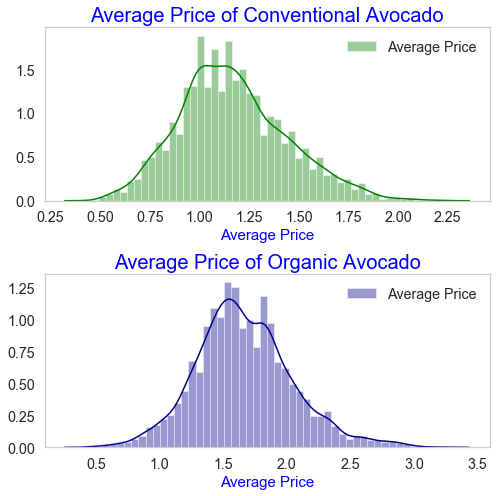

In [18]:
data_conv = df_avo[df_avo["type"] == "conventional"]
data_org = df_avo[df_avo["type"] == "organic"]

# Set up the matplotlib figure
f, axes = plt.subplots(figsize = (7,7))

plt.subplot(2,1,1)
sns.distplot(data_conv.AveragePrice,color="green",label="Average Price")
plt.title("Average Price of Conventional Avocado",fontsize = 20, color='blue')
plt.xlabel('Average Price', fontsize = 15, color='blue')
plt.legend()
plt.grid()

plt.subplot(2,1,2)
sns.distplot(data_org.AveragePrice,color="darkblue",label="Average Price")
plt.title("Average Price of Organic Avocado",fontsize = 20, color='blue')
plt.xlabel('Average Price', fontsize = 15, color='blue')
plt.tight_layout()
plt.legend()
plt.grid()

__Observation__<br/>
Distribution of Average Price seems to be normal

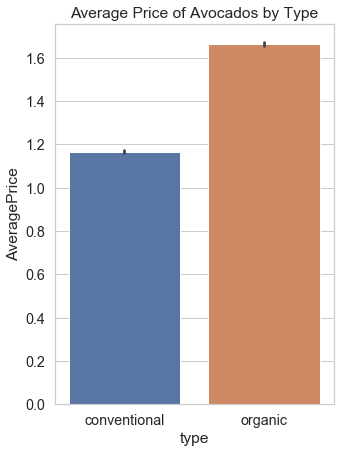

In [19]:
plt.figure(figsize=(5,7))
plt.title("Average Price of Avocados by Type")
Av= sns.barplot(x="type",y="AveragePrice",data=df_avo)

__Observation__<br/>
Organic Avocados are Priced Higher Compared to Conventional Avocados

<a id=section42></a>

### 4.2 Analysis Based on Average Price

In [20]:
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

groupBy1_price = data_conv.groupby('Date').mean()
scatter1 = go.Scatter(x=groupBy1_price.AveragePrice.index, y=groupBy1_price.AveragePrice, name="Conventional")

groupBy2_price = data_org.groupby('Date').mean()
scatter2 = go.Scatter(x=groupBy2_price.AveragePrice.index, y=groupBy2_price.AveragePrice, name="Organic")

data = [scatter1, scatter2]
layout=go.Layout(title="Time Series Plot for Mean Daily Price of Conventional and Organic Avocados", xaxis={'title':'Date'}, yaxis={'title':'Prices'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

__Observation__<br/>
Time Series Plot Confirms that Daily Price of Organic Avocados are Higher Compared to Conventional Avocados

<a id=section43></a>

### 4.3 Analysis Based on Total Volume

In [22]:
groupBy1_volume = data_conv.groupby('Date').mean()
groupBy2_volume = data_org.groupby('Date').mean()

scatter1 = go.Scatter(x=groupBy1_volume['Total Volume'].index, y=groupBy1_volume['Total Volume'], name="Conventional")

scatter2 = go.Scatter(x=groupBy2_volume['Total Volume'].index, y=groupBy2_volume['Total Volume'], name="Organic")

data = [scatter1, scatter2]
layout=go.Layout(title="Time Series Plot for Volume of Conventional and Organic Avocados Sold", xaxis={'title':'Date'}, yaxis={'title':'Volume'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

In [23]:
groupBy1_Total_Volume = data_conv['Total Volume'].agg('sum')
groupBy2_Total_Volume = data_org['Total Volume'].agg('sum')

values=[groupBy1_Total_Volume, groupBy2_Total_Volume]
labels=['Conventional','Organic']

trace=go.Pie(labels=labels,values=values)
iplot([trace])

__Observation__<br/>
Total Volume for Conventional Avocados is Way Higher Compared to Organic Avocados

<a id=section44></a>

### 4.4 Analysis Based on Region

Text(0.5, 1, 'Year Wise Average Price of Conventional Avocados According to Region')

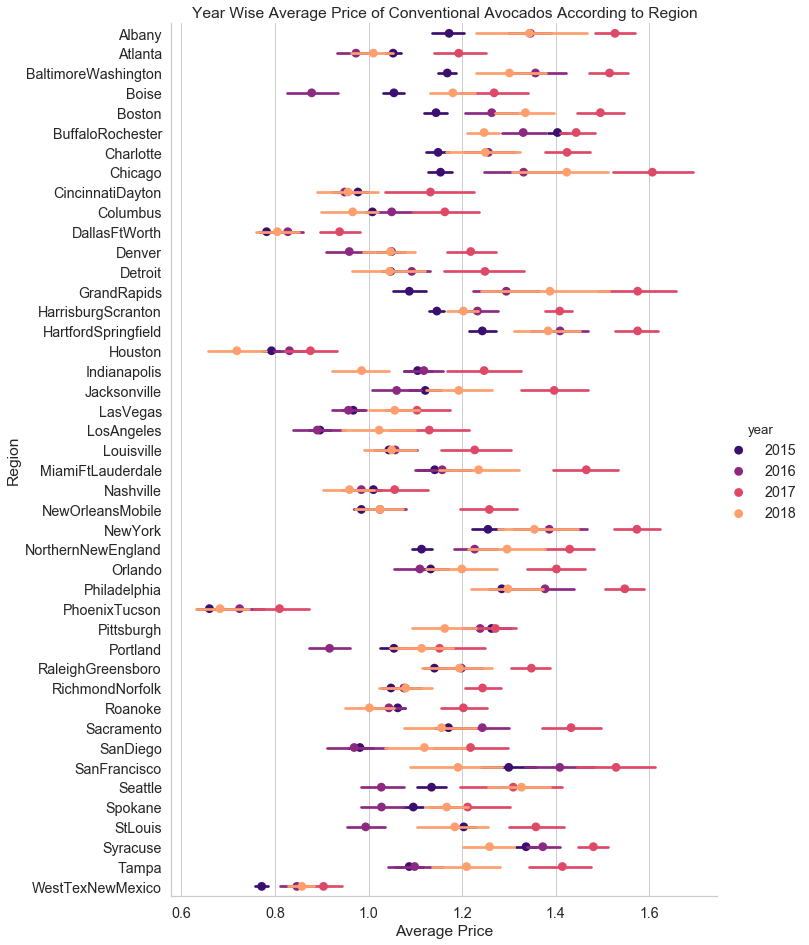

In [24]:
g = sns.factorplot('AveragePrice','region',data=data_conv,hue='year',size=13,aspect=0.8,palette='magma',join=False)
plt.xlabel('Average Price')
plt.ylabel('Region')
plt.title('Year Wise Average Price of Conventional Avocados According to Region')

Text(0.5, 1, 'Year Wise Average Price of Organic Avocados According to Region')

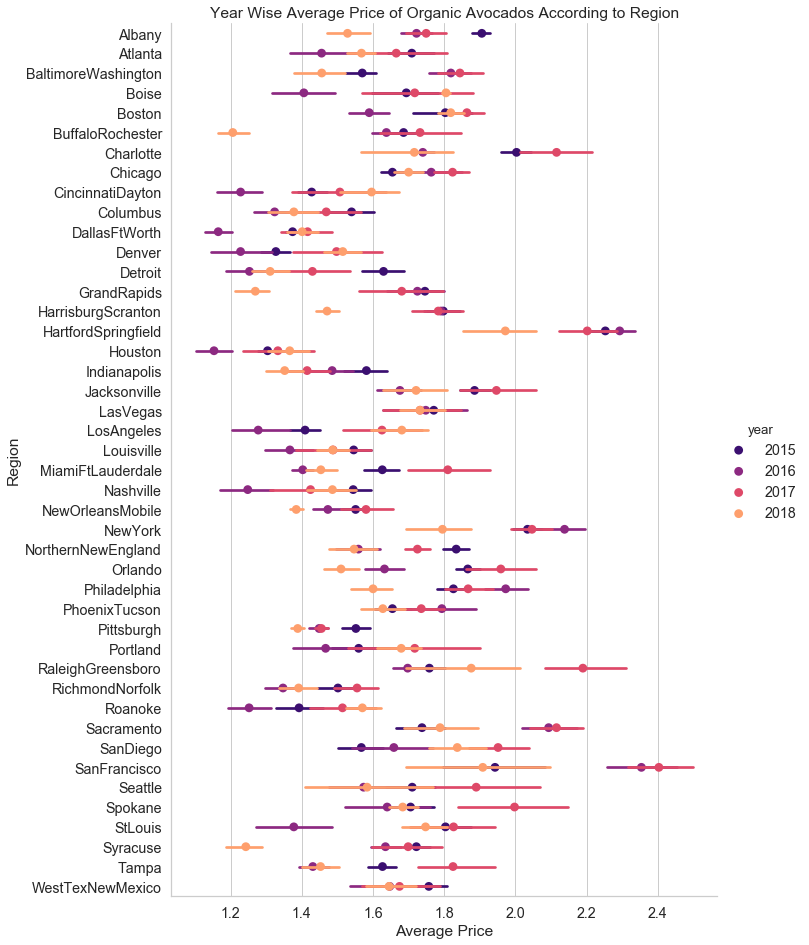

In [25]:
g = sns.factorplot('AveragePrice','region',data=data_org,hue='year',size=13,aspect=0.8,palette='magma',join=False)
plt.xlabel('Average Price')
plt.ylabel('Region')
plt.title('Year Wise Average Price of Organic Avocados According to Region')

__Observation__<br/>
San Francisco has Hightest Rates for Avocados in 2017

<a id=section5></a>

## 5. Feature Engineering

### Check Correlation

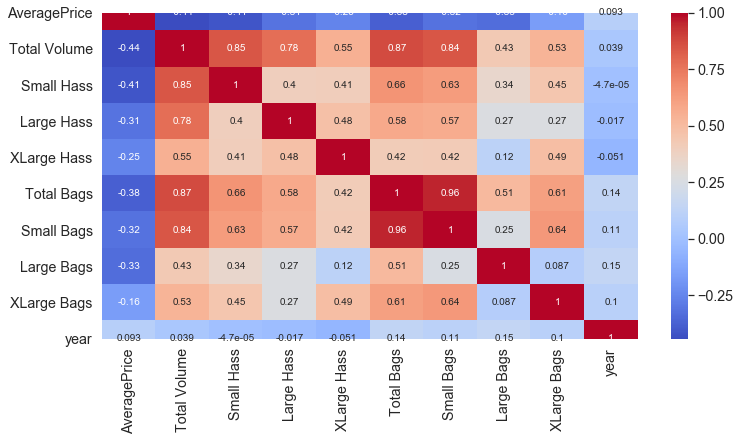

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(df_avo.corr(),cmap='coolwarm',annot=True)

In [27]:
# There is a high correlation between those pairs: 
# small hass & total volume (0.85)
# total bags & total volume (0.87)
# small bags & total bags (0.96)

# Total Bags = Small Bags + Large Bags + XLarge Bags, to avoid multicollinearity drop Total Bags column.
# Total Volume = Small Hass +Large Hass +XLarge Hass + Total Bags , to avoid multicollinearity drop Total Volume column.

df_avo = df_avo.drop(['Date','Total Volume', 'Total Bags', 'year'], axis = 1)

In [28]:
df_avo.head()

,AveragePrice,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,Albany
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,Albany
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,Albany
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,Albany
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,Albany


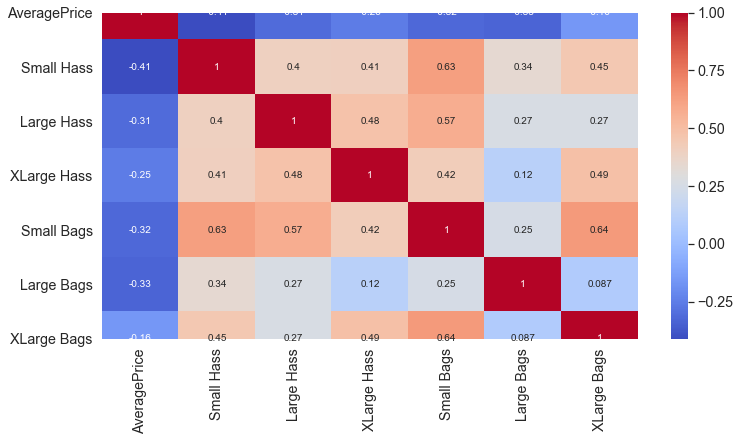

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(df_avo.corr(),cmap='coolwarm',annot=True)

__Observation__

- Correlation between Independent Variables is now < |0.8|.

### Visualize Pairwise correlation

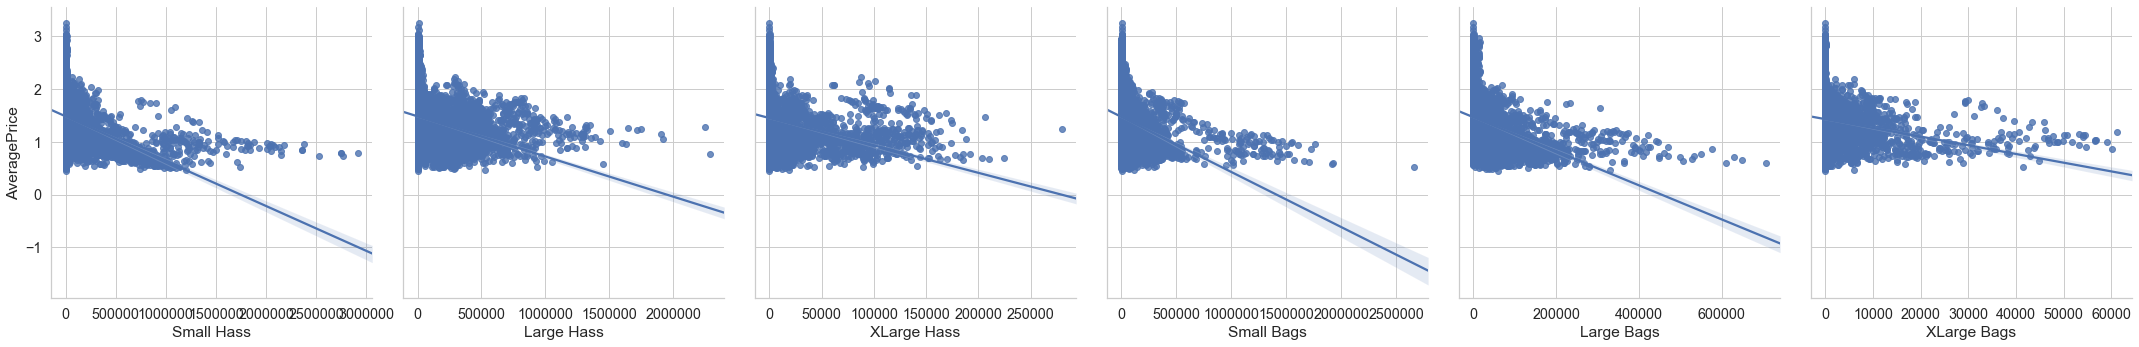

In [34]:
sns.pairplot(df_avo, x_vars=['Small Hass', 'Large Hass', 'XLarge Hass', 'Small Bags', 'Large Bags', 'XLarge Bags'],
             y_vars='AveragePrice', size=5, aspect=1, kind='reg')

__Observation__

- Relationship between Dependent & Independent Variables is Linear
- If Independent Variables are Increasing, Target Variable is Decreasing. Hence Negative Correlation

### Apply Scaling to Numerical Explanatory Variables

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_avo.loc[:,'Small Hass':'XLarge Bags'] = scaler.fit_transform(df_avo.loc[:,'Small Hass':'XLarge Bags']) 
df_avo.head()

,AveragePrice,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,-0.400686,-0.213965,-0.342408,-0.371965,-0.375971,-0.233194,conventional,Albany
1,1.35,-0.402495,-0.272455,-0.341901,-0.365577,-0.375872,-0.233194,conventional,Albany
2,0.93,-0.401894,0.111936,-0.338305,-0.376424,-0.375739,-0.233194,conventional,Albany
3,1.08,-0.400210,-0.109563,-0.341191,-0.395205,-0.375022,-0.233194,conventional,Albany
4,1.28,-0.401161,-0.277224,-0.341032,-0.392752,-0.373523,-0.233194,conventional,Albany


### Apply OHE (One Hot Encoding) to Categorical Explanatory Variables

In [38]:
df_avo = pd.get_dummies(df_avo, columns=['type','region'], drop_first = True)
df_avo.head()

,AveragePrice,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,type_organic,region_Atlanta,region_BaltimoreWashington,...,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
0,1.33,-0.400686,-0.213965,-0.342408,-0.371965,-0.375971,-0.233194,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.35,-0.402495,-0.272455,-0.341901,-0.365577,-0.375872,-0.233194,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.93,-0.401894,0.111936,-0.338305,-0.376424,-0.375739,-0.233194,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.08,-0.400210,-0.109563,-0.341191,-0.395205,-0.375022,-0.233194,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.28,-0.401161,-0.277224,-0.341032,-0.392752,-0.373523,-0.233194,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Prepare X and Y for Applying Machine Learning Models

In [39]:
X = df_avo.loc[:,df_avo.columns != 'AveragePrice']
X.head()

,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,...,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
0,-0.400686,-0.213965,-0.342408,-0.371965,-0.375971,-0.233194,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.402495,-0.272455,-0.341901,-0.365577,-0.375872,-0.233194,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.401894,0.111936,-0.338305,-0.376424,-0.375739,-0.233194,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.400210,-0.109563,-0.341191,-0.395205,-0.375022,-0.233194,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.401161,-0.277224,-0.341032,-0.392752,-0.373523,-0.233194,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
y = df_avo['AveragePrice']
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

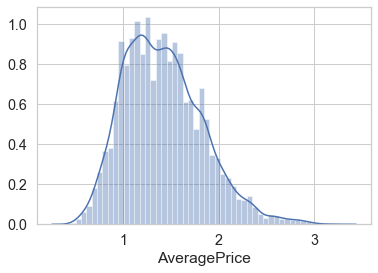

In [41]:
sns.distplot(y, color="b")

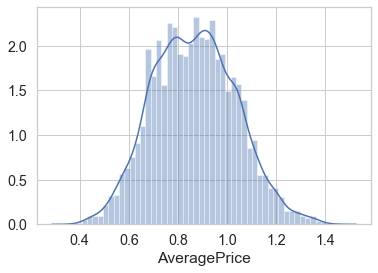

In [42]:
#Applying Log Transformation as Relation between Explanatory & Target Variable is Inverse
y = np.log1p(y)
sns.distplot(y, color="b")

<a id=section6></a>

## 6. Using Models for Prediction

### Splitting X and y into training and test datasets

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

### Checking the shape of X and y of train dataset

In [45]:
print(X_train.shape)
print(y_train.shape)

(11895, 50)
(11895,)


### Checking the shape of X and y of test dataset

In [46]:
print(X_test.shape)
print(y_test.shape)

(2974, 50)
(2974,)


### Instantiating Linear Regression using scikit learn with default parameters

Text(0.5, 1.0, 'Distribution of Residuals in Linear Regression')

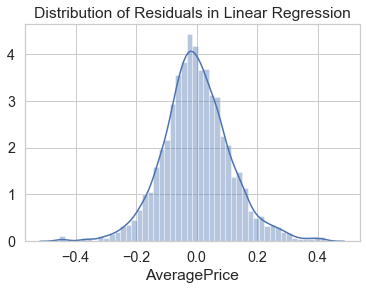

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

LR = LinearRegression()
LR.fit(X_train, y_train) #Fitting the model on X_train and y_train
y_pred_test_LR = LR.predict(X_test) #Predict on X_test

# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_test - y_pred_test_LR)
plt.title('Distribution of Residuals in Linear Regression')

### Instantiating Decision Tree Regression using scikit learn with default parameters

Text(0.5, 1.0, 'Distribution of Residuals in Decision Tree Regression')

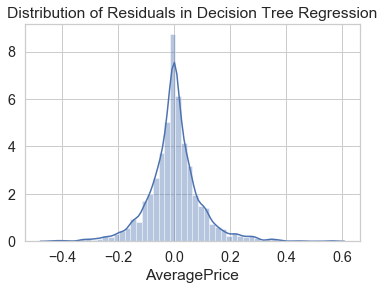

In [75]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(X_train, y_train) #Fitting the model on X_train and y_train
y_pred_test_DT = DT.predict(X_test) #Predict on X_test

# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_test - y_pred_test_DT)
plt.title('Distribution of Residuals in Decision Tree Regression')

### Instantiating Random Forest Regression using scikit learn with default parameters

Text(0.5, 1.0, 'Distribution of Residuals in Random Forest Regression')

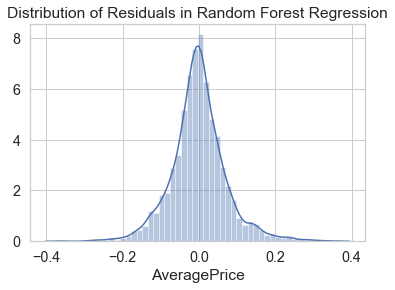

In [76]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X_train, y_train) #Fitting the model on X_train and y_train
y_pred_test_RF = RF.predict(X_test) #Predict on X_test

# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_test - y_pred_test_RF)
plt.title('Distribution of Residuals in Random Forest Regression')

__Observation__

- The error terms in all 3 models are normally distributed.

<a id=section7></a>

## 7. Models Evaluation

In [70]:
print('Linear Regression Model Scores', '\nR2:', LR.score(X_train, y_train),
      '\nMAE:', metrics.mean_absolute_error(y_test, y_pred_test_LR),
      '\nMSE:', metrics.mean_squared_error(y_test, y_pred_test_LR),
      '\nRMSE:', (np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_LR))))
print('\nDecision Tree Reg Model Scores', '\nR2:', DT.score(X_train, y_train),
      '\nMAE:', metrics.mean_absolute_error(y_test, y_pred_test_DT),
      '\nMSE:', metrics.mean_squared_error(y_test, y_pred_test_DT),
      '\nRMSE:', (np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_DT))))
print('\nRandom Forest Reg Model Scores', '\nR2:', RF.score(X_train, y_train),
      '\nMAE:', metrics.mean_absolute_error(y_test, y_pred_test_RF),
      '\nMSE:', metrics.mean_squared_error(y_test, y_pred_test_RF),
      '\nRMSE:', (np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_RF))))

Linear Regression Model Scores 
R2: 0.5819775307596409 
MAE: 0.08568805608314128 
MSE: 0.012694054606845594 
RMSE: 0.11266789519133476

Decision Tree Reg Model Scores 
R2: 1.0 
MAE: 0.06388631872431554 
MSE: 0.008858416456374304 
RMSE: 0.09411916094172484

Random Forest Reg Model Scores 
R2: 0.968259510872614 
MAE: 0.051388012520084236 
MSE: 0.005128343678964818 
RMSE: 0.07161245477544265


#### Feature Importances in Priority Order from Random Forest Regression Model

In [71]:
feature_importances = pd.DataFrame(RF.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
type_organic,0.368182
Small Hass,0.150137
Large Bags,0.123041
Large Hass,0.087200
Small Bags,0.076570
XLarge Hass,0.046725
XLarge Bags,0.024035
region_SanFrancisco,0.015120
region_HartfordSpringfield,0.009217
region_Seattle,0.007677


<a id=section8></a>

## 8. Conclusion

- __Random Forest Regression Model__ gives the Best Prediction (__RMSE : 0.072, R2 : 0.97__)<br/>
<br/>
- __Features Importance:__ Avocados Type (Conventional / Organic) is of Prime Importance in Predicting the Average Prices<br/>
<br/>
- __Expensive Organic Avocados:__ We have noticed that Organic Avocados are much more Expensive than Conventional Avocados<br/>
<br/>
- __Year 2017:__ The Price of Avocados was highest which can be linked with Total Volume (No. of Avocados Sold). The usual Demand & Supply Economic Model suggests that if Supply decreases and Demand remains unchanged, then it results in higher equilibrium price and lower quantity, Average Price & Total Volume in our context<br/>
<br/>
- __Volatility:__ Although, 2017 was the year with the highest prices, it was also the year with the highest volatility. This means that price fluctuations were higher in this year as compared to 2015 & 2016.